In [60]:
import pandas as pd
import numpy as np
import re as re

In [61]:
!pip3 install chardet

In [62]:
pwd

'/Users/jm/Desktop/ironhack/curso/shark-project'

In [63]:
import chardet

with open('./Input/GSAF5.csv', 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large


df = pd.read_csv('./Input/GSAF5.csv', encoding=result['encoding'])
print(df.shape)

(5992, 24)


In [64]:
#Busco los nulos existentes en las columnas
null_cols = df.isnull().sum()
null_cols

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
pdf                          0
href formula                 1
href                         3
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64

In [65]:
#Elimino unnamed22 y unnamed 23 porque no continen datos
drop_cols = list(null_cols[null_cols > 5000].index)
df = df.drop(drop_cols, axis=1)
print(df.shape)

(5992, 22)


In [66]:
#Elimino CaseNumber.1 y CaseNumber.2 porque son un duplicado de la primera columna CaseNumber
df = df.drop(columns=['Case Number.1', 'Case Number.2'])
print(df.shape)

(5992, 20)


In [67]:
''' 
Sale False porque no son exactamente iguales ya que al ver cuantos nulos hay en cada uno en una salen más que en otra,
pero observando los datos las URL son iguales, por lo que borramos la que más nulos tiene.
'''
df['href formula'].equals(df['href'])

df = df.drop(columns=['href'])
print(df.shape)

(5992, 19)


In [68]:
#La columna pdf se refiere al pdf que surje de la URL por lo que no nos da información extra.
df = df.drop(columns=['pdf'])
print(df.shape)

(5992, 18)


In [69]:
df["Fatal (Y/N)"].value_counts().sort_index()

 N            8
#VALUE!       1
F             1
N          4315
N             1
UNKNOWN      94
Y          1552
n             1
Name: Fatal (Y/N), dtype: int64

In [70]:
#Unifico valores en la columna Fatal para saber cuantos han sido mortales y cuales no
df = df.rename(columns={"Fatal (Y/N)":"Fatal"})
df.Fatal = df.Fatal.replace({"N": "N", "n": "N", "#VALUE!": "N", "F":"Y", "UNKNOWN":"N", " N": "N", "N ": "N", "Y": "Y"})


In [71]:
df["Fatal"].value_counts().sort_index()

N    4420
Y    1553
Name: Fatal, dtype: int64

In [72]:
df["Year"].value_counts().sort_index()

0       124
5         1
77        1
500       1
1543      1
       ... 
2012    117
2013    122
2014    125
2015    139
2016    103
Name: Year, Length: 232, dtype: int64

In [73]:
#Elimino las filas con un año inferior a 1850 porque no me fio de como hacian los registros en esa época.
df = df.drop(df[df['Year']<1850].index)

In [74]:
df["Year"].value_counts().sort_index()

1850      1
1851      3
1852     10
1853      7
1854      1
       ... 
2012    117
2013    122
2014    125
2015    139
2016    103
Name: Year, Length: 166, dtype: int64

In [75]:
#Ataques últimos 50 años de 1800 son entre 1-20 al año por lo que no es muy representativo
x = df[(df["Year"] <1900)]
x["Year"].value_counts().sort_index()
df = df.drop(df[df['Year']<1900].index)
y = df[(df["Year"] <1950)]
y["Year"].value_counts().sort_index()
'''Ataques primeros 50 años de 1900 son como mucho 40 al año por lo que no es muy representativo
Mi hipotesis comenzará a partir de los años 50
'''
df = df.drop(df[df['Year']<1950].index)
z = df[(df["Year"] <2000)]
z["Year"].value_counts().sort_index()


1950    43
1951    31
1952    29
1953    36
1954    42
1955    43
1956    51
1957    41
1958    54
1959    93
1960    93
1961    78
1962    86
1963    61
1964    66
1965    51
1966    58
1967    48
1968    46
1969    30
1970    42
1971    28
1972    35
1973    27
1974    38
1975    49
1976    39
1977    26
1978    25
1979    25
1980    35
1981    49
1982    40
1983    50
1984    41
1985    37
1986    39
1987    35
1988    55
1989    53
1990    38
1991    38
1992    56
1993    56
1994    56
1995    76
1996    61
1997    57
1998    65
1999    65
Name: Year, dtype: int64

In [76]:
df = df.rename(columns={"Species ":"Species"})


0             NaN
1             NaN
2             NaN
3             NaN
4       2 m shark
          ...    
4266          NaN
4267          NaN
4268          NaN
4269          NaN
4270          NaN
Name: Species, Length: 4271, dtype: object

In [77]:
df["Species"].value_counts()

White shark                               146
Shark involvement not confirmed            73
Tiger shark                                51
Bull shark                                 42
4' shark                                   37
                                         ... 
1.8 m silky shark                           1
White shark, 3 to 3.5m                      1
White shark, 2 m to 4 m [6'9" to 13']       1
Tawny nurse shark                           1
Mako shark, 1.8 m [6']                      1
Name: Species, Length: 1339, dtype: int64

In [97]:
#Limpio la columna Species
df = df.rename(columns={"Species ":"Species"})
df["Species"]= df["Species"].str.replace(".*[bB]ull.*", "bull shark", case = False) 
df["Species"]= df["Species"].str.replace(".*[tT]iger.*", "tiger shark", case = False) 
df["Species"]= df["Species"].str.replace(".*[wW]hite.*", "white shark", case = False) 
df["Species"]= df["Species"].str.replace(".*[lL]emon.*", "lemon shark", case = False) 
df["Species"]= df["Species"].str.replace(".*[hH]ammerhead.*", "hammerhead shark", case = False) 
df["Species"]= df["Species"].str.replace(".*[nN]urse.*", "nurse shark", case = False) 
df["Species"]= df["Species"].str.replace(".*[bB]ronze.*", "bronze whaler shark", case = False) 
df["Species"]= df["Species"].str.replace(".*[bB]lue.*", "blue shark", case = False) 
df["Species"]= df["Species"].str.replace(".*[nN]ot.*", "Shark involvement not confirmed", case = False) 
df["Species"]= df["Species"].str.replace(".*[sS]and.*", "sand shark", case = False) 
df["Species"]= df["Species"].str.replace(".*[wW]hale.*", "whale shark", case = False) 
df["Species"]= df["Species"].str.replace(".*[aA]ngel.*", "angel shark", case = False) 
df["Species"]= df["Species"].str.replace(".*[mM]ako.*", "mako shark", case = False) 
df["Species"]= df["Species"].str.replace(".*[sS]ilver.*", "silver shark", case = False) 
df["Species"]= df["Species"].str.replace(".*[rR]aggedtooth.*", "raggedtooth shark", case = False) 
df["Species"]= df["Species"].str.replace(".*[zZ]ambesi.*", "zambesi shark", case = False) 


print(set(df['Species']))


{nan, "1.2 m [4'] shark", 'Dusky shark, 2m', "Wobbegong shark, 5' ", "2.5 m [8.25'] shark", 'Wobbegong shark, 1.4 m [4\'6"] ', "5' shark", 'bull shark', "3.7 m to 4.6 m [12' to 15'] shark", 'Starry smoothhound shark, 1m', 'Juvenile dusky shark', 'C. maculpinnis or C. limbatus', 'Juvenile dusky or blacktip shark', "1.2 m to 1.8 m [4' to 6'] shark", ' ', "Blacktip shark, 2' ", "3 m [10'] shark seen in vicinity", "0.9 m to 1.2 m [3' to 4'] shark; Tooth fragment recovered from hand", '2 m  "yellow belly" captive shark. Shark destroyed by aquarium staff next day', "Carpet shark, 5' ", "0.7 m [2.5'] shark", " Blacktip shark, C. maculipinnis. 1.9 m to 2.1 m [6.5' to 7'] ", "1.8 m to 2.4 m [6' to 8'] shark, tooth fragments recovered ", "60 cm to 90 cm [2' to 3'] blacktip or spinner shark", "Bitten by several 1.8 m [6'] sharks", '"small brown-colored shark"', 'Shark involvement  questionable', '4.3 m shark', 'Shark involvement prior to death remains unconfirmed', "5.5 m [18'] shark seen in the 

In [98]:
df["Species"].value_counts()


white shark                                      588
tiger shark                                      226
bull shark                                       160
Shark involvement not confirmed                   96
nurse shark                                       80
                                                ... 
1.6 m shark                                        1
Caribbean reef shark, 4.5'                         1
1.5 to 2 m [5' to 6.75'] shark                     1
1.5 to 2 m shark                                   1
6' shark, possibly a blactip or spinner shark      1
Name: Species, Length: 547, dtype: int64

In [210]:
'''
Al eliminar las últimas filas la columna original order no tiene sentido,
también elimino area y location porque mi hipotesis se va a centrar en paises,
y el Investigator or Source, name y Activity porque no da un dato que me interese
'''
df = df.drop(columns=['Area', 'Location', 'original order', 'Investigator or Source', 'Name', 'Injury', 'Time','Species ','Activity'])

In [211]:
#Renombro los paises mal escritos
print(set(df['Country']))
df["Country"].value_counts()
df.Country = df.Country.replace({" PHILIPPINES": "PHILIPPINES", " TONGA": "TONGA", 'ST. MAARTIN':'ST. MARTIN', 'SOUTH CHINA SEA':'CHINA', 'Fiji':'FIJI', 'Seychelles':'SEYCHELLES'})

{nan, 'SOMALIA', 'CROATIA', 'OKINAWA', 'TAIWAN', 'UNITED KINGDOM', 'INDIAN OCEAN', 'IRAQ', 'TUNISIA', 'REUNION', 'NAMIBIA', 'NORTH PACIFIC OCEAN', 'MICRONESIA', 'WESTERN SAMOA', 'SENEGAL', 'THAILAND', 'BELIZE', 'BRITISH VIRGIN ISLANDS', 'FRANCE', 'NICARAGUA ', 'GREECE', 'YEMEN', 'FIJI', 'USA', 'ARUBA', 'PAPUA NEW GUINEA', 'HONDURAS', 'MONTENEGRO', 'ANGOLA', 'INDIA', ' TONGA', 'SOUTH PACIFIC OCEAN', 'SPAIN', 'BRITISH ISLES', 'PACIFIC OCEAN', 'UNITED ARAB EMIRATES (UAE)', 'GRAND CAYMAN', 'KENYA', 'RED SEA / INDIAN OCEAN', 'IRAN', 'NORTH ATLANTIC OCEAN', 'MARSHALL ISLANDS', 'CAYMAN ISLANDS', 'MALAYSIA', 'URUGUAY', 'SINGAPORE', 'ANDAMAN / NICOBAR ISLANDAS', 'UNITED ARAB EMIRATES', 'DIEGO GARCIA', 'TONGA', 'EGYPT / ISRAEL', 'CHILE', 'BERMUDA', 'TANZANIA', 'JAPAN', 'PHILIPPINES', 'PORTUGAL', 'VANUATU', 'EL SALVADOR', 'NORTH ATLANTIC OCEAN ', 'FRENCH POLYNESIA', 'ADMIRALTY ISLANDS', 'BRAZIL', 'MARTINIQUE', 'SOLOMON ISLANDS', 'NEW ZEALAND', 'MAURITIUS', 'VIETNAM', 'PANAMA', 'ARGENTINA', 'MID A

In [212]:
#Agrupo boating y boat
df.Type = df.Type.replace({"Boating": "Boat"})

In [213]:
#Quito el espacio del nombre de la columna y unifico valores
df = df.rename(columns={"Sex ":"Sex"})
df["Sex"].value_counts()
df.Sex = df.Sex.replace({"M ": "M"})


In [214]:
df["Sex"].value_counts()
print(df.shape)

(4271, 9)


In [215]:
#Elimino los datos que no me interesan ya que quiero saber por ataques a hombres o a mujeres
df = df.drop(df[(df['Sex']==".")].index)
df = df.drop(df[(df['Sex']=="lli")].index)
df = df.drop(df[(df['Sex']=="N")].index)
print(df.shape)

(4270, 9)


In [216]:
df["Sex"].value_counts()

M    3385
F     491
Name: Sex, dtype: int64

In [217]:
df["Age"].value_counts()

19                 118
20                 114
16                 113
15                 113
17                 113
                  ... 
adult                1
46 & 34              1
MAKE LINE GREEN      1
>50                  1
28, 23 & 30          1
Name: Age, Length: 136, dtype: int64

In [218]:
#Limpio la columna edad y lo paso a enteros
df['Age'] = df['Age'].str.replace('[a-z]', ' ')
df['Age'] = df['Age'].str.replace('[A-Z]', ' ')
df['Age'] = df['Age'].str.replace('\?', '')
df['Age'] = df['Age'].str.replace('.', ' ')
df['Age'] = df['Age'].str.replace('&', ' ')
df['Age'] = df['Age'].str.replace('-', ' ')
df['Age'] = df['Age'].str.replace('>', ' ')
df['Age'] = df['Age'].str.replace('\(', '')
df['Age'] = df['Age'].str.replace('\)', '')
df['Age'] = df['Age'].str.replace('½', '')
df['Age'] = df['Age'].str.replace('\xa0 ', '')
df['Age'] = df['Age'].str.replace('\s+', '')
df['Age'] = df['Age'].str.replace('""', '')
df = df.drop(df[(df['Age']=="")].index)
df.shape

(4248, 9)

In [219]:
df = df[df['Age'].str.len().lt(3)]
print(set(df['Age']))
df['Age'].value_counts()
df.dtypes
df.shape

{'77', '60', '62', '66', '51', '11', '48', '34', '27', '75', '31', '53', '84', '35', '10', '42', '17', '43', '6', '46', '18', '28', '86', '81', '40', '7', '32', '13', '21', '14', '78', '3', '23', '15', '22', '74', '71', '38', '52', '73', '64', '36', '44', '29', '57', '54', '12', '1', '45', '68', '30', '37', '50', '24', '8', '5', '65', '33', '16', '59', '67', '20', '9', '72', '58', '63', '41', '69', '87', '19', '47', '56', '70', '25', '49', '26', '55', '39', '61'}


(2823, 9)

In [220]:
df["Age"] = df["Age"].astype(int)
df.shape

(2823, 9)

In [221]:
df.dtypes

Case Number     object
Date            object
Year             int64
Type            object
Country         object
Sex             object
Age              int64
Fatal           object
href formula    object
dtype: object

In [222]:
df

,Case Number,Date,Year,Type,Country,Sex,Age,Fatal,href formula
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,M,16,N,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,M,36,N,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,M,43,N,http://sharkattackfile.net/spreadsheets/pdf_di...
6,2016.09.11,11-Sep-16,2016,Unprovoked,USA,M,60,N,http://sharkattackfile.net/spreadsheets/pdf_di...
7,2016.09.07,07-Sep-16,2016,Unprovoked,USA,F,51,N,http://sharkattackfile.net/spreadsheets/pdf_di...
...,...,...,...,...,...,...,...,...,...
4247,1950.05.24,24-May-50,1950,Unprovoked,SOUTH AFRICA,M,27,N,http://sharkattackfile.net/spreadsheets/pdf_di...
4249,1950.04.09.b,09-Apr-50,1950,Sea Disaster,AUSTRALIA,M,50,Y,http://sharkattackfile.net/spreadsheets/pdf_di...
4252,1950.03.08,08-Mar-50,1950,Unprovoked,SOUTH AFRICA,M,20,Y,http://sharkattackfile.net/spreadsheets/pdf_di...
4255,1950.02.11,11-Feb-50,1950,Unprovoked,SOUTH AFRICA,M,14,Y,http://sharkattackfile.net/spreadsheets/pdf_di...


In [223]:
#Cuantas mujeres han muerto en ataques
filtered = df[(df['Sex']=='F') & (df['Fatal']>='Y')]
filtered.groupby(['Country']).max()

,Case Number,Date,Year,Type,Sex,Age,Fatal,href formula
Country,,,,,,,,
AUSTRALIA,2016.06.05.a,28-Jan-63,2016,Unprovoked,F,63,Y,http://sharkattackfile.net/spreadsheets/pdf_di...
BERMUDA,1959.09.27,27-Sep-59,1959,Invalid,F,29,Y,http://sharkattackfile.net/spreadsheets/pdf_di...
BRAZIL,2013.07.22,22-Jul-2013,2013,Unprovoked,F,18,Y,http://sharkattackfile.net/spreadsheets/pdf_di...
CROATIA,1955.08.26,26-Aug-55,1955,Unprovoked,F,32,Y,http://sharkattackfile.net/spreadsheets/pdf_di...
EGYPT,2010.12.05,05-Dec-10,2010,Unprovoked,F,70,Y,http://sharkattackfile.net/spreadsheets/pdf_di...
GREECE,1963.06.01.b,1956,1963,Unprovoked,F,42,Y,http://sharkattackfile.net/spreadsheets/pdf_di...
HONG KONG,1995.06.13,13-Jun-95,1995,Unprovoked,F,65,Y,http://sharkattackfile.net/spreadsheets/pdf_di...
ITALY,1951.09.29,29-Sep-51,1951,Unprovoked,F,21,Y,http://sharkattackfile.net/spreadsheets/pdf_di...
MALDIVE ISLANDS,1959.12.00,Dec-59,1959,Sea Disaster,F,3,Y,http://sharkattackfile.net/spreadsheets/pdf_di...


In [226]:
#Mi hipotesis se va a relacionar por el país por lo que me creo un DataFrame que recoja los datos que quiero por paises
df['count'] = df.groupby('Country')['Country'].transform('count')
df = df.rename(columns={'count':'Attacks'})
df2 = df[['Attacks', 'Country']]

In [227]:
z = df2.groupby(['Country']).mean().sort_index(ascending=True)
z

,Attacks,Attacks
Country,,
ADMIRALTY ISLANDS,1,1
AMERICAN SAMOA,3,3
ANDAMAN / NICOBAR ISLANDAS,1,1
ARGENTINA,1,1
ARUBA,1,1
...,...,...
USA,1349,1349
VANUATU,5,5
VENEZUELA,4,4


In [228]:
df3 = df[['Type', 'Country']]
df3.groupby(['Country']).max()


,Type
Country,
ADMIRALTY ISLANDS,Unprovoked
AMERICAN SAMOA,Unprovoked
ANDAMAN / NICOBAR ISLANDAS,Unprovoked
ARGENTINA,Unprovoked
ARUBA,Unprovoked
...,...
USA,Unprovoked
VANUATU,Unprovoked
VENEZUELA,Unprovoked


In [229]:
print(set(df['Sex']))
df5 = df[['Sex', 'Country']]
#df5 = df5.dropna()
df5.groupby(['Country']).max()

{nan, 'M', 'F'}


,Sex
Country,
ADMIRALTY ISLANDS,M
AMERICAN SAMOA,M
ANDAMAN / NICOBAR ISLANDAS,M
ARGENTINA,M
ARUBA,M
...,...
USA,NaN
VANUATU,M
VENEZUELA,M


In [230]:
pd.set_option('precision', 0)
dfAge = df[['Age', 'Country']]
dfAge.groupby(['Country']).mean()

,Age
Country,
ADMIRALTY ISLANDS,26
AMERICAN SAMOA,26
ANDAMAN / NICOBAR ISLANDAS,32
ARGENTINA,18
ARUBA,58
...,...
USA,27
VANUATU,17
VENEZUELA,37


In [231]:
df6 = df[['Fatal', 'Country']]
df6.groupby(['Country']).max()

,Fatal
Country,
ADMIRALTY ISLANDS,N
AMERICAN SAMOA,Y
ANDAMAN / NICOBAR ISLANDAS,Y
ARGENTINA,N
ARUBA,Y
...,...
USA,Y
VANUATU,Y
VENEZUELA,Y


In [232]:
df7 = df[['Year', 'Country']]
df7.groupby(['Country']).max()

,Year
Country,
ADMIRALTY ISLANDS,1962
AMERICAN SAMOA,1958
ANDAMAN / NICOBAR ISLANDAS,1958
ARGENTINA,1954
ARUBA,2015
...,...
USA,2016
VANUATU,2005
VENEZUELA,2004


In [233]:
#Por qué no me funciona esto?
#df3 = df.drop(df[(df['Date']!='[0-9]+.[A-Z][a-z]+.[0-9]+')].index)
#df3
#a = str(df['Date'])
#print(re.findall("[0-9]+.[A-Z][a-z]+.[0-9]+", a))

In [234]:
final = pd.concat([df2, df3, df5, dfAge, df6, df7], axis=1)
finalbien=final.T.drop_duplicates().T
finalbien


,Attacks,Country,Type,Sex,Age,Fatal,Year
0,1e+03,USA,Unprovoked,M,16,N,2016
1,1e+03,USA,Unprovoked,M,36,N,2016
2,1e+03,USA,Unprovoked,M,43,N,2016
6,1e+03,USA,Unprovoked,M,60,N,2016
7,1e+03,USA,Unprovoked,F,51,N,2016
...,...,...,...,...,...,...,...
4247,3e+02,SOUTH AFRICA,Unprovoked,M,27,N,1950
4249,5e+02,AUSTRALIA,Sea Disaster,M,50,Y,1950
4252,3e+02,SOUTH AFRICA,Unprovoked,M,20,Y,1950
4255,3e+02,SOUTH AFRICA,Unprovoked,M,14,Y,1950


In [235]:
print(finalbien.dtypes)
print(finalbien.columns)
finalbien["Attacks"] = finalbien["Attacks"].astype(float)
finalbien["Age"] = finalbien["Age"].astype(int)
finalbien["Year"] = finalbien["Year"].astype(int)


Attacks    object
Country    object
Type       object
Sex        object
Age        object
Fatal      object
Year       object
dtype: object
Index(['Attacks', 'Country', 'Type', 'Sex', 'Age', 'Fatal', 'Year'], dtype='object')


In [236]:
finalbien['Type'].value_counts()

Unprovoked      2354
Provoked         234
Invalid          187
Sea Disaster      29
Boat              19
Name: Type, dtype: int64

In [237]:
finalbien['Sex'].value_counts()

M    2398
F     392
Name: Sex, dtype: int64

In [238]:
#Pasar esto a numeros para ver cuantos mueren
finalbien['Fatal'] = finalbien['Fatal'].str.replace('N', '0')
finalbien['Fatal'] = finalbien['Fatal'].str.replace('Y', '1')
finalbien['Fatal'].value_counts()
finalbien['Fatal'].fillna(0, inplace=True)
finalbien["Fatal"] = finalbien["Fatal"].astype(int)


In [239]:
print(finalbien.dtypes)

Attacks    float64
Country     object
Type        object
Sex         object
Age          int64
Fatal        int64
Year         int64
dtype: object


In [240]:
Attacks = finalbien.groupby('Country', as_index=False).aggregate({'Attacks':'max', 'Age':'mean', 'Year':'max', 'Fatal':'sum'})
Attacks.columns=['Country', 'Attacks', 'Age', 'Year', 'Fatal']
display(Attacks)


,Country,Attacks,Age,Year,Fatal
0,ADMIRALTY ISLANDS,1,26,1962,0
1,AMERICAN SAMOA,3,26,1958,3
2,ANDAMAN / NICOBAR ISLANDAS,1,32,1958,1
3,ARGENTINA,1,18,1954,0
4,ARUBA,1,58,2015,1
...,...,...,...,...,...
105,USA,1349,27,2016,79
106,VANUATU,5,17,2005,3
107,VENEZUELA,4,37,2004,2
108,VIETNAM,5,47,2010,0


In [241]:
Attacks = Attacks.sort_values(['Attacks'], ascending=[False])


In [242]:
Attacks['% Fatal']=Attacks['Fatal']*100/Attacks['Attacks']
Attacks

,Country,Attacks,Age,Year,Fatal,% Fatal
105,USA,1349,27,2016,79,6
5,AUSTRALIA,486,29,2016,107,22
89,SOUTH AFRICA,305,26,2016,61,20
7,BAHAMAS,59,37,2016,5,8
10,BRAZIL,56,23,2016,21,38
...,...,...,...,...,...,...
64,NORTH ATLANTIC OCEAN,1,34,1980,0,0
65,NORTH ATLANTIC OCEAN,1,15,1955,0,0
67,NORTH SEA,1,18,1960,0,0
68,NORWAY,1,48,2007,0,0


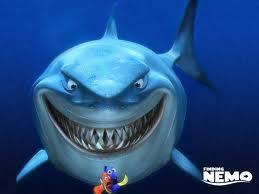

In [243]:
from IPython.display import Image
Image(filename='./tiburon.jpeg', width=400 , height=400)

In [245]:
'''
Mi hipotesis es que le dan mala fama a los tiburones en Hollywood, denominandolos "Tiburones Asesinos",
y todos los ataques que ha habido en USA desde el año 1950, solo el 6% han acabado con la muerte de personas.
'''

'\nMi hipotesis es que le dan mala fama a los tiburones en Hollywood, denominandolos "Tiburones Asesinos",\ny todos los ataques que ha habido en USA desde el año 1950, solo el 6% han acabado con la muerte de personas.\n'

In [248]:
Attacks.to_csv('Attacks.csv', header=True, index=False)